In [22]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline

Text(0, 0.5, 'Number of Playgrounds')

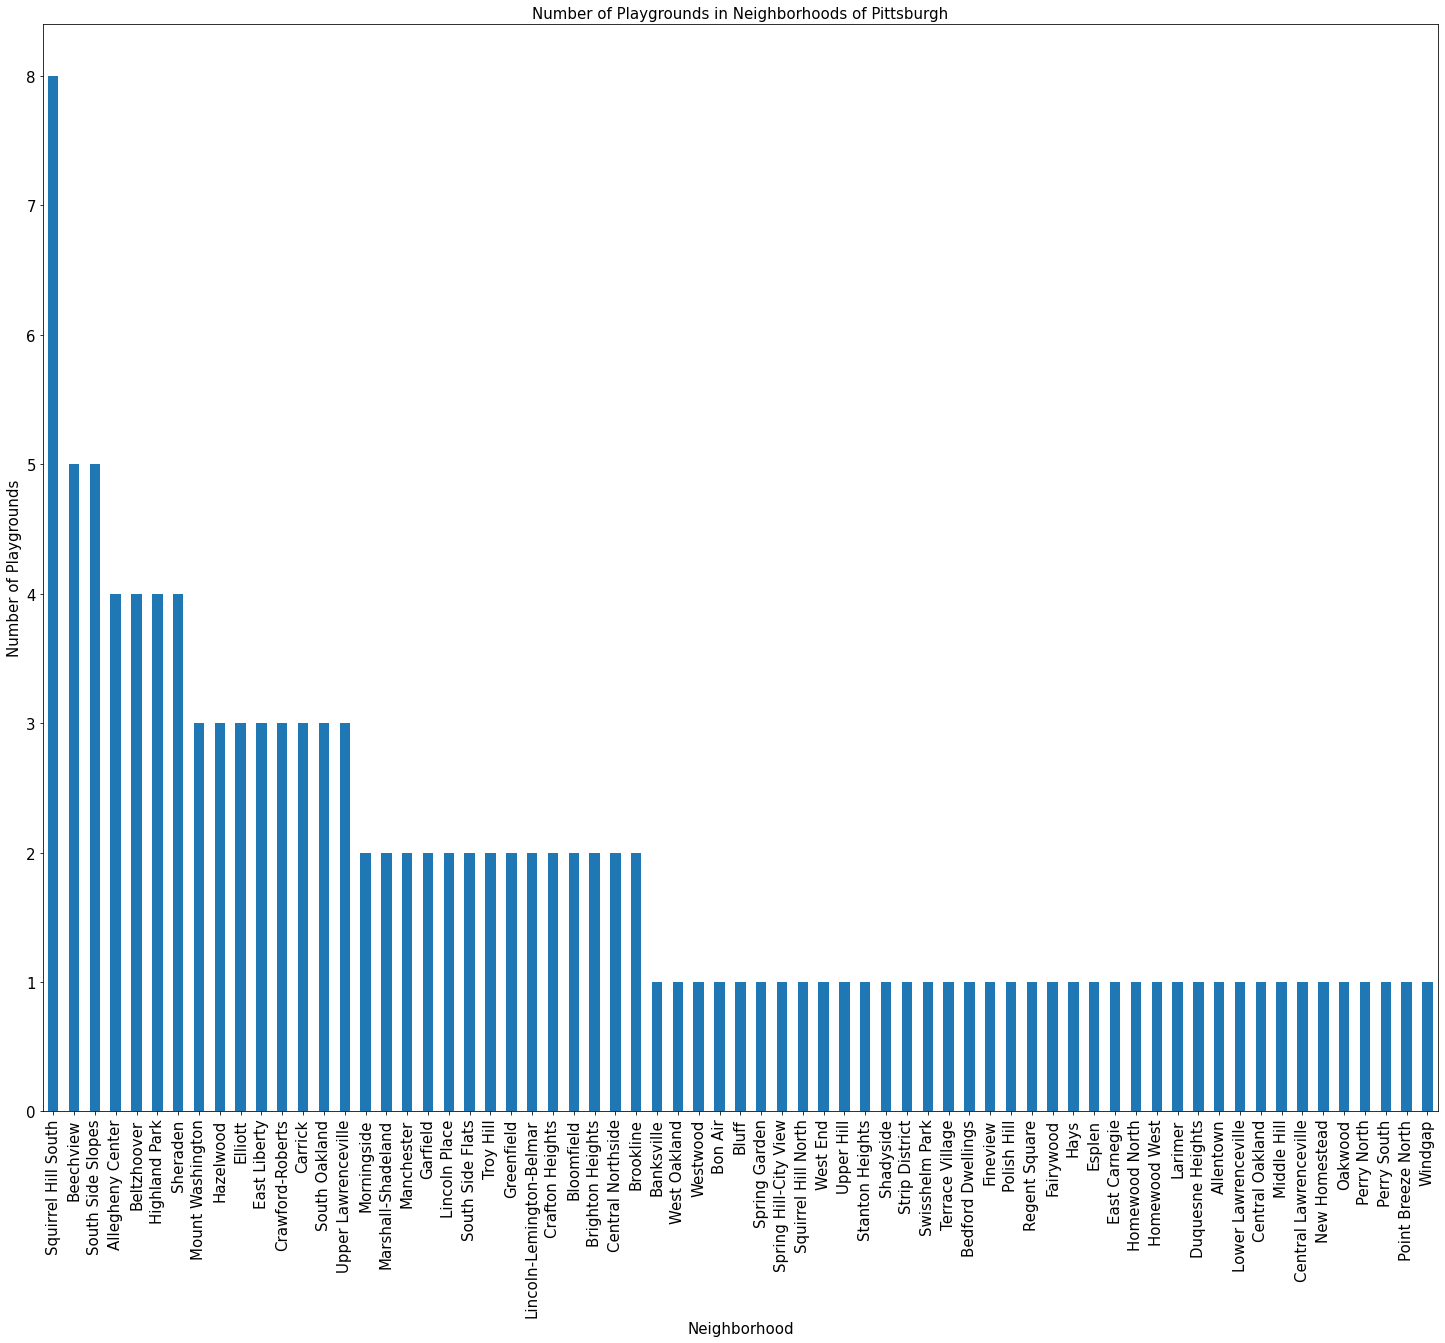

In [23]:
data = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")
data = data.groupby('neighborhood').count()
data.head()

azData = data[['id']].sort_values(by='neighborhood', ascending=True)
sortedData = data[['id']].sort_values(by='id', ascending=False)
# azData
# sortedData

ax = sortedData.plot(kind='bar', figsize=(25,20),legend=False, fontsize=15)
ax.set_title("Number of Playgrounds in Neighborhoods of Pittsburgh", fontsize=15)
ax.set_xlabel('Neighborhood', fontsize = 15)
ax.set_ylabel('Number of Playgrounds', fontsize = 15)

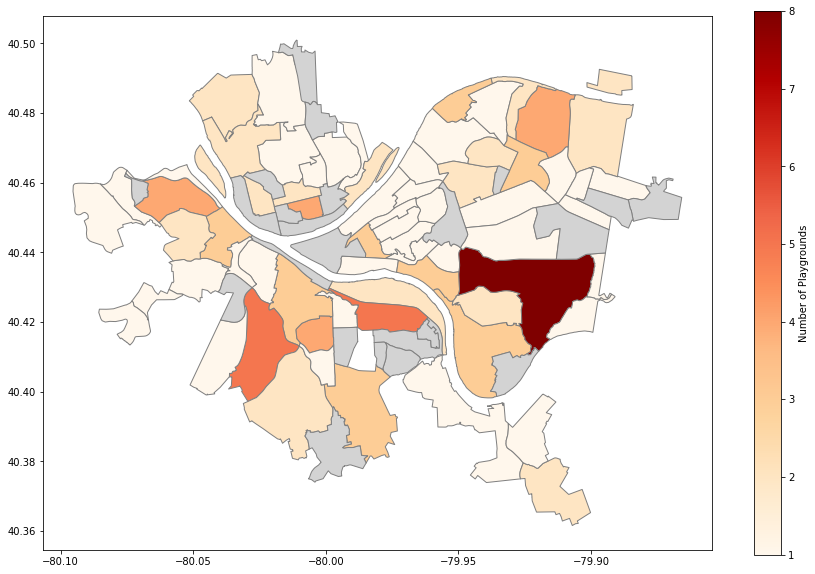

In [24]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
# neighborhoods.plot()
playground_map = neighborhoods.merge(sortedData, how="left", left_on="hood", right_on="neighborhood")
playground_map.plot(column='id', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="grey",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )